I'll look into the different offense formation applied by teams in the different plays 


In [37]:
#Import necessary libraries and load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly as py
from plotly.subplots import make_subplots
%matplotlib inline 

In [38]:
df = pd.read_csv('/Users/Elham/NFL_Files/train.csv', low_memory=False) 
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [39]:
df.columns #Checking the columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [40]:
#Different offense formations and it's applied frequencies in each season
count_formation = df.groupby(['OffenseFormation', 'Season'])['PlayId'].nunique()

#create a pivot table 'OffenseFormation' as the index and each seaon as the columns
OffensForm_Count = pd.DataFrame(count_formation).reset_index()
OffensForm_Count = OffensForm_Count.pivot(index='OffenseFormation', columns='Season', 
                                          values='PlayId').sort_values(2017, ascending=False)

#Change the column name's data type from int to string
OffensForm_Count.columns = OffensForm_Count.columns.astype(str)

#create a column to sum the value of all 3 season
OffensForm_Count['All'] = OffensForm_Count['2017'] + OffensForm_Count['2018'] + OffensForm_Count['2019']

OffensForm_Count



Season,2017,2018,2019,All
OffenseFormation,,,,
SINGLEBACK,5330.0,4921.0,3373.0,13624.0
SHOTGUN,3236.0,3626.0,2527.0,9389.0
I_FORM,2763.0,2059.0,1403.0,6225.0
JUMBO,277.0,245.0,155.0,677.0
PISTOL,273.0,350.0,356.0,979.0
WILDCAT,10.0,53.0,14.0,77.0
EMPTY,8.0,15.0,8.0,31.0
ACE,1.0,NaN,NaN,NaN


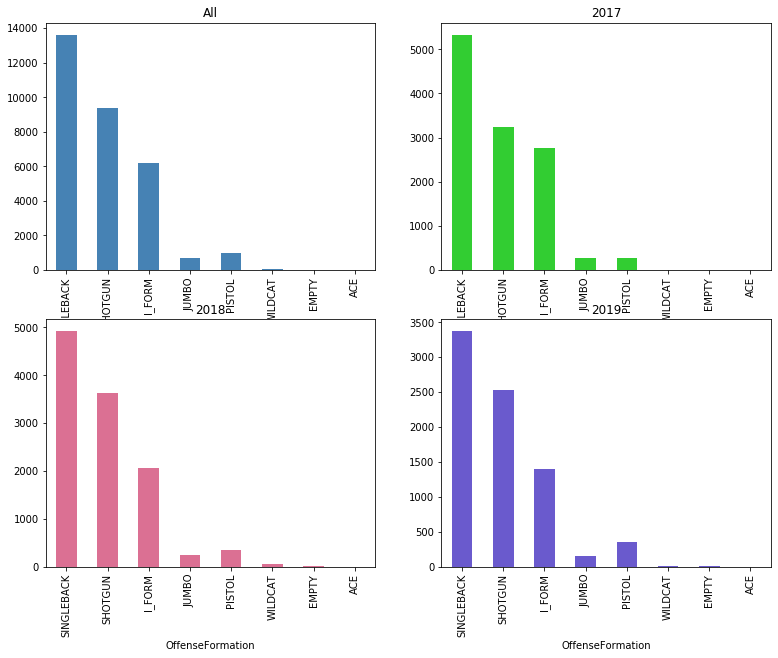

In [41]:
#Plot the freaquency of using different offense formation on plays in different seasons and in total

fig, axs = plt.subplots(2, 2, figsize=(13,10))

OffensForm_Count["All"].plot(ax=axs[0, 0], color='steelblue', kind='bar')
axs[0, 0].set_title('All')

OffensForm_Count["2017"].plot(ax=axs[0, 1], color='limegreen', kind='bar')
axs[0, 1].set_title('2017')

OffensForm_Count["2018"].plot(ax=axs[1, 0], color='palevioletred', kind='bar')
axs[1, 0].set_title('2018')

OffensForm_Count["2019"].plot(ax=axs[1, 1], color='slateblue', kind='bar')
axs[1, 1].set_title('2019')

plt.show()

The three most freaquently used offense formations are SINGLEBACK, SHOTGUN, I_FORM. 

In [42]:
#Select 3 most freaquently used offense formation

SINGLEBACK = df[df.OffenseFormation=='SINGLEBACK']['Yards']
SHOTGUN = df[df.OffenseFormation=='SHOTGUN']['Yards']
I_FORM = df[df.OffenseFormation=='I_FORM']['Yards']
Top3_Formation = [SINGLEBACK, SHOTGUN, I_FORM]

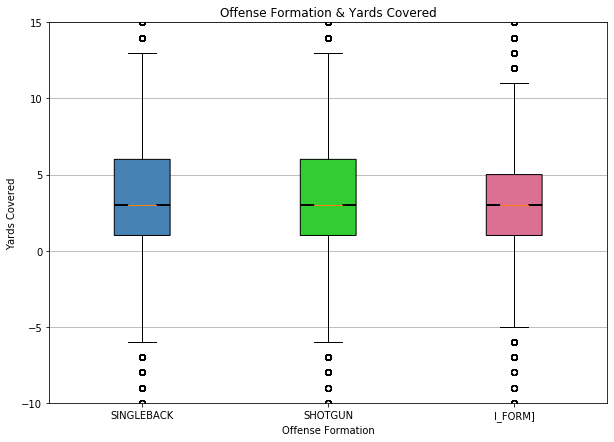

In [43]:
#boxplot of yards covered by using the 3 most frequent offense formation

fig, ax = plt.subplots(1, figsize=(10, 7)) 

bp = ax.boxplot(Top3_Formation, labels=['SINGLEBACK', 'SHOTGUN', 'I_FORM]'], notch=True,  
                         vert=True,patch_artist=True)

ax.set_title('Offense Formation & Yards Covered')
ax.set_xlabel('Offense Formation')
ax.set_ylabel('Yards Covered')
ax.yaxis.grid(True)

#Zoom up  
x1, x2, y1, y2 = 0.5, 3.5, -10, 15

ax.set_xlim(x1, x2)
ax.set_ylim(y1, y2)

colors = ['steelblue', 'limegreen', 'palevioletred']    
for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

The difference of the covered yards using the three most freaquent offense formations are looking not very big

In [44]:
#Create a dataframe that contains descriptive statistics of yards using the top three offense formations

yards_form = pd.DataFrame({'OffenseFormation': ['SINGLEBACK', 'SHOTGUN', 'I_FORM'], 
                                'Mean': [SINGLEBACK.mean(), SHOTGUN.mean(), I_FORM.mean()],
                                'Std': [SINGLEBACK.std(), SHOTGUN.std(), I_FORM.std()], 
                                'count': [len(SINGLEBACK), len(SHOTGUN), len(I_FORM)]})

#The confidience interval in 95% level

yards_form['lower_95'] = yards_form['Mean'] - 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form['upper_95'] = yards_form['Mean'] + 1.96*yards_form['Std']/np.sqrt(yards_form['count'])

yards_form


,OffenseFormation,Mean,Std,count,lower_95,upper_95
0,SINGLEBACK,4.213153,6.654555,299728,4.189329,4.236977
1,SHOTGUN,4.468740,6.002322,206558,4.442855,4.494625
2,I_FORM,4.090120,6.704173,136950,4.054613,4.125628


The diffence in covered yards using different offense formations seem to be statistically significant, but practically not. 